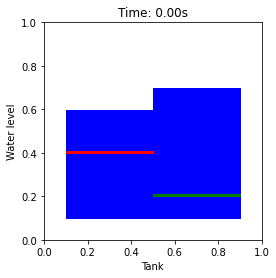

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
w = 1.0    # inflow rate
v1 = 0.2   # outflow rate from tank 1
v2 = 0.3   # outflow rate from tank 2
r1 = 0.4   # minimum level for tank 1
r2 = 0.2   # minimum level for tank 2

# Simulation time
t_start = 0.0
t_end = 10.0
dt = 0.01
t = np.arange(t_start, t_end, dt)

# Initial conditions
x1 = 0.5
x2 = 0.6

# Create the figure and axis for the animation
fig, ax = plt.subplots()

# Define the function that updates the animation
def update(i):
    global x1, x2
    # Calculate the inflow based on the current water levels
    if x1 <= r1:
        inflow = w - v1
    elif x2 <= r2:
        inflow = w - v2
    else:
        inflow = 0.0

    # Calculate the rates of change for the water levels
    dx1dt = inflow - v1
    dx2dt = inflow - v2

    # Update the water levels
    x1 += dx1dt * dt
    x2 += dx2dt * dt

    # Clear the axis and plot the new water levels
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    ax.add_artist(plt.Rectangle((0.1, 0.1), 0.4, x1, color='blue'))
    ax.add_artist(plt.Rectangle((0.5, 0.1), 0.4, x2, color='blue'))
    ax.add_artist(plt.Rectangle((0.1, r1), 0.4, 0.01, color='red'))
    ax.add_artist(plt.Rectangle((0.5, r2), 0.4, 0.01, color='green'))
    ax.set_title(f'Time: {i*dt:.2f}s')
    ax.set_xlabel('Tank')
    ax.set_ylabel('Water level')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(t), interval=30, repeat=False)

# Show the animation
plt.show()
